In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom as pdicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
import glob
import cv2

from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


In [2]:
data_dir='DOI'
patients = os.listdir(data_dir)
patients.sort()

In [3]:
labels_df= pd.read_csv('calc_case_description_test_set.csv',index_col=0)

In [4]:
labels_df.head(10)

,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
patient_id,,,,,,,,,,,,,
P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...
P_00038,2,RIGHT,MLO,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_2/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_2/1.3.6.1.4.1.9590...
P_00041,1,LEFT,CC,2,calcification,LUCENT_CENTER,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00041_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00041_LEFT_CC_2/1.3.6.1.4.1.9590.1...,Calc-Test_P_00041_LEFT_CC_2/1.3.6.1.4.1.9590.1...
P_00041,1,LEFT,MLO,2,calcification,LUCENT_CENTER,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00041_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00041_LEFT_MLO_2/1.3.6.1.4.1.9590....,Calc-Test_P_00041_LEFT_MLO_2/1.3.6.1.4.1.9590....
P_00077,2,LEFT,CC,1,calcification,ROUND_AND_REGULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Test_P_00077_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00077_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00077_LEFT_CC_1/1.3.6.1.4.1.9590.1...


In [ ]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, P_00038 to P_02501
Data columns (total 13 columns):
breast density             326 non-null int64
left or right breast       326 non-null object
image view                 326 non-null object
abnormality id             326 non-null int64
abnormality type           326 non-null object
calc type                  322 non-null object
calc distribution          263 non-null object
assessment                 326 non-null int64
pathology                  326 non-null object
subtlety                   326 non-null int64
image file path            326 non-null object
cropped image file path    326 non-null object
ROI mask file path         326 non-null object
dtypes: int64(4), object(9)
memory usage: 35.7+ KB


In [ ]:

x=labels_df.groupby('patient_id')['ROI mask file path'].unique()[43]
loc=data_dir+'/'+x[0]
redf=pdicom.read_file(loc[:])

# output=(int(input*255)/65535).astype(uint8)
img=((redf.pixel_array/65535)*255).astype(np.uint8)

#plt.imshow(img,cmap=plt.cm.bone)
cv2.imshow('im1',img)
cv2.imshow('im2',redf.pixel_array)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(0)
#plt.show()

print(redf)
#ConstPixelDims=(int(redf.Rows),int(redf.Columns),len(x))
#ConstPixelSpacing=(float(redf.PixelSpacing[0]),float(redf.PixelSpacing[1]),
              #     float(redf.SliceThickness))

In [4]:
x=labels_df.groupby('patient_id')['cropped image file path'].unique()[0]
x

array([ 'Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.161465562211359959230647609981488894942/1.3.6.1.4.1.9590.100.1.2.419081637812053404913157930753972718515/000001.dcm\n',
       'Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.29112199613143138535387754440942211739/1.3.6.1.4.1.9590.100.1.2.188613955710170417803011787532523988680/000001.dcm\n',
       'Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.200764632211227648028305709420627883105/1.3.6.1.4.1.9590.100.1.2.244876997513875090239564803900035037851/000001.dcm\n',
       'Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590.100.1.2.248538452013626298441249276382187367143/1.3.6.1.4.1.9590.100.1.2.360550081712464813321995483083632007570/000001.dcm\n',
       'Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.348569460311013218440657632223354965172/1.3.6.1.4.1.9590.100.1.2.126295284812046209819441424913058621714/000001.dcm\n',
       'Calc-Test_P_00038_RIGHT_MLO_2/1.3.6.1.4.1.9590.100.1.2.573626950127809277210088847

In [7]:
#cropped images

import mahotas as mh

x=labels_df.groupby('patient_id')['image file path'].unique()[19]
loc=data_dir+'/'+x[0]
redf=pdicom.read_file(loc[:])
img=((redf.pixel_array/65535)*255).astype(np.uint8)

print(mh.features.haralick(img).mean(0))
img=redf.pixel_array
print(mh.features.haralick(img).mean(0))


[  1.98860112e-01   3.44508502e+00   9.99420047e-01   2.97028344e+03
   6.85315088e-01   9.84030278e+01   1.18776887e+04   5.55824358e+00
   6.72595689e+00   1.42448462e-03   1.93620373e+00  -6.46145535e-01
   9.99135421e-01]


KeyboardInterrupt: 

255 148


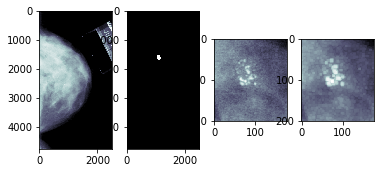

In [16]:
import mahotas as mh
pat=10
x=labels_df.groupby('patient_id')['image file path'].unique()[pat]
y=labels_df.groupby('patient_id')['cropped image file path'].unique()[pat]
z=labels_df.groupby('patient_id')['ROI mask file path'].unique()[pat]
loc1=data_dir+'/'+x[0]
loc2=data_dir+'/'+y[0]
loc3=data_dir+'/'+z[0]
i1=pdicom.read_file(loc1[:])
i2=pdicom.read_file(loc2[:-1])
i3=pdicom.read_file(loc3[:])
#print(i1,'\n')
#print(i2,'\n')
#print(i3,'\n')
img1=i1.pixel_array
img2=i2.pixel_array
img3=i3.pixel_array
img4=((img3/65535)*255).astype(np.uint8)

# ((pixel – min) / (max – min))*255
mx=img4.max()
mn=img4.min()
print(mx,mn)
img4=((img4-mn)/(mx-mn))*255

kernel=np.ones((5,5),np.float32)/25
dilation=cv2.dilate(img4,kernel,iterations=1)
#dst=cv2.filter2D(dilation,-1,kernel)

plt.subplot(141).imshow(img1,cmap=plt.cm.bone)
plt.subplot(142).imshow(img2,cmap=plt.cm.bone)
plt.subplot(143).imshow(img3,cmap=plt.cm.bone)
#img4=cv2.resize(img1,None,fx=0.25, fy=.25)

plt.subplot(144).imshow(dilation,cmap=plt.cm.bone)
plt.show()

In [23]:
'''[  2.47427627e-01   9.39696232e+00   9.98748162e-01   3.75460055e+03
   6.97435735e-01   9.62242458e+01   1.50090052e+04   5.05213933e+00
   6.23526174e+00   1.52376333e-03   1.96511715e+00  -6.29075092e-01
   9.98328112e-01] =>1/2

[  2.46762020e-01   2.53850976e+01   9.96603323e-01   3.73942522e+03
   6.59817510e-01   9.60958337e+01   1.49323158e+04   5.06199936e+00
   6.46313755e+00   1.39633891e-03   2.23994539e+00  -5.79466160e-01
   9.97410027e-01] =>1/4 
'''


'[  2.47427627e-01   9.39696232e+00   9.98748162e-01   3.75460055e+03\n   6.97435735e-01   9.62242458e+01   1.50090052e+04   5.05213933e+00\n   6.23526174e+00   1.52376333e-03   1.96511715e+00  -6.29075092e-01\n   9.98328112e-01] =>1/2\n\n[  2.46762020e-01   2.53850976e+01   9.96603323e-01   3.73942522e+03\n   6.59817510e-01   9.60958337e+01   1.49323158e+04   5.06199936e+00\n   6.46313755e+00   1.39633891e-03   2.23994539e+00  -5.79466160e-01\n   9.97410027e-01] =>1/4 \n'

In [5]:
import mahotas as mh
pat=10

for i in range(pat):
    x=labels_df.groupby('patient_id')['image file path'].unique()[i]
    loc1=data_dir+'/'+x[0]
    i1=pdicom.read_file(loc1[:])
    img1=i1.pixel_array
    img4=cv2.resize(img1,None,fx=0.25, fy=.25)
    img1=((img4/65535)*255).astype(np.uint8)
    print(mh.features.haralick(img1).mean(0))


[  4.74456585e-01   1.12935688e+01   9.96041390e-01   1.42661364e+03
   7.83168783e-01   4.41903384e+01   5.69516099e+03   3.26647527e+00
   4.15239647e+00   2.56533899e-03   1.63043593e+00  -5.87541862e-01
   9.84053158e-01]
[  2.77737464e-01   3.68473533e+01   9.92689436e-01   2.52304300e+03
   6.66070127e-01   8.36997838e+01   1.00553246e+04   4.60672788e+00
   5.99286795e+00   1.42436883e-03   2.21030515e+00  -5.46729901e-01
   9.94460998e-01]
[  3.02942396e-01   1.72007688e+01   9.97496352e-01   3.43734879e+03
   6.82608524e-01   9.13840078e+01   1.37321944e+04   4.64629379e+00
   5.95658632e+00   1.50863067e-03   2.13391835e+00  -5.77081824e-01
   9.95990891e-01]
[  3.09420329e-01   2.16540518e+01   9.98174474e-01   5.93249925e+03
   7.03080769e-01   1.13033400e+02   2.37083429e+04   4.81137397e+00
   6.05597118e+00   1.61251708e-03   2.07211269e+00  -6.10380509e-01
   9.97528104e-01]
[  2.85562884e-01   1.70731003e+01   9.97610137e-01   3.57390729e+03
   6.85940241e-01   8.93163

In [78]:
inp=labels_df[['left or right breast','image view','pathology','ROI mask file path']][labels_df['pathology']!='BENIGN_WITHOUT_CALLBACK']
def ff(x):
    loc=data_dir+'/'+x
    img=pdicom.read_file(loc)
    imgpx=((img.pixel_array/65535)*255).astype(np.uint8)
    return(mh.features.haralick(imgpx).mean(0))

res=inp.loc['P_00038':'P_01538']
#inp.shape[0]
#print(res)
#res['hr'] = res['ROI mask file path'].map(ff)
#$res
#plt.imshow(imgpx,cmap=plt.cm.bone)


259